In [2]:
import subprocess
import os
os.chdir(subprocess.getoutput("git rev-parse --show-toplevel"))
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src import get_data, linear_model, preprocess, utility

In [3]:
term_dict = {
    'train': ['2011-01-01', '2014-12-31'],
    'valid': ['2015-01-01', '2015-12-31'],
    'test' : ['2016-01-01', '2016-12-31']
}

In [4]:
panel = get_data.symbols2daily_values()
features, labels, terms = preprocess.panel2get_batch(panel, term_dict, feature_term=6)


In [6]:
linear = linear_model.LinearModel(features, labels, terms)
linear.inference()

(array([  2.60000000e+01,   1.10000000e+01,   6.67200000e+03,
          1.91600000e+03,   1.00420000e+04,   4.24020000e+04,
          1.23281000e+05,   2.21109000e+05,   6.45490000e+04,
          8.00000000e+02]),
 array([-20.0746767 , -19.57546219, -19.07624767, -18.57703316,
        -18.07781865, -17.57860413, -17.07938962, -16.5801751 ,
        -16.08096059, -15.58174607, -15.08253156]),
 <a list of 10 Patch objects>)

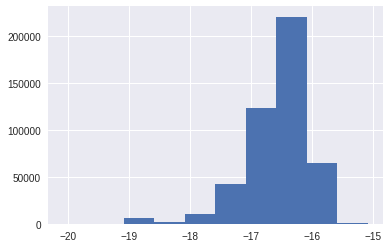

In [70]:
data_key = 'train'
arr = utility.np1(linear.model.predict(linear.features[data_key]) - labels[data_key])
f = np.log10(np.abs(arr + 1e-19))
plt.hist(f)

(array([  3.00000000e+00,   6.00000000e+00,   2.60000000e+01,
          1.24000000e+02,   7.27000000e+02,   3.37400000e+03,
          1.63940000e+04,   6.19000000e+04,   3.49850000e+04,
          3.97000000e+02]),
 array([-7.62020749, -6.93077935, -6.24135121, -5.55192308, -4.86249494,
        -4.17306681, -3.48363867, -2.79421053, -2.1047824 , -1.41535426,
        -0.72592612]),
 <a list of 10 Patch objects>)

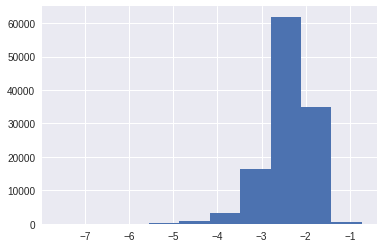

In [60]:
plt.hist(f)

(array([  2.00000000e+00,   8.00000000e+00,   3.50000000e+01,
          1.66000000e+02,   1.40000000e+03,   5.01100000e+03,
          2.18750000e+04,   6.27410000e+04,   2.62560000e+04,
          4.42000000e+02]),
 array([-6.97620473, -6.32603045, -5.67585617, -5.02568189, -4.37550761,
        -3.72533333, -3.07515905, -2.42498477, -1.77481049, -1.12463621,
        -0.47446193]),
 <a list of 10 Patch objects>)

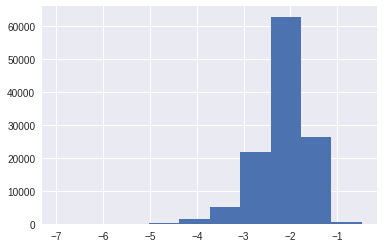

In [65]:
plt.hist(np.log10(np.abs(utility.np1(labels['valid'] + 10e-5))))

In [4]:
from pandas_datareader.oanda import get_oanda_currency_historical_rates

In [9]:
os.environ['https_proxy']

'http://proxy.kuins.net:8080'

In [10]:
import oandapy

In [ ]:
oanda = oandapy.API(environment='practice', access_token=os.environ['oanda_token'])